In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 라이브러리 추가
import pandas as pd
import requests; from urllib.parse import urlparse
import seaborn as sns
import matplotlib; import matplotlib.pyplot as plt
import squarify
import numpy as np
import re
import networkx as nx

In [3]:
# 카카오 검색 API: 블로그 검색 함수
def kakao_api_blog(keyword, page):
    url = "https://dapi.kakao.com/v2/search/blog?&query=" + keyword + "&size=50" + "&page=" + str(page)
    result = requests.get(urlparse(url).geturl(),
                          headers={"Authorization":"KakaoAK eff211bf8582f738022370f0760c10c0"})
    json_obj = result.json()
    return json_obj

In [4]:
# 블로그 검색결과 데이터프레임
list=[]; keyword = "메타버스"; page = 1
while page <= 50:
    json_obj = kakao_api_blog(keyword, page)
    for document in json_obj['documents']:
        val = [document['title'].replace("<b>","").replace("</b>",""),
              document['contents'].replace("<b>","").replace("</b>",""),
              document['blogname'], document['datetime'], document['url']]
        list.append(val)
    if json_obj['meta']['is_end'] is True: break
    page += 1
    
# 블로그 검색결과 데이터프레임
df1 = pd.DataFrame(list, columns = ['title', 'contents', 'name', 'datetime', 'url'])
df1.head(10)

,title,contents,name,datetime,url
0,메타버스 관련주 정리,메타버스 관련주를 살펴보기 위해서는 거대한 나무를 그려봐야 한다고들 합니다. 국내 ...,Hong Kong Story,2021-12-11T01:00:21.000+09:00,http://abouthongkong.ontactlife.com/33
1,메타버스 국내순위 확인,한국이 세계 메타버스 강국이 되면서 이용자 수가 증가하거나 새로운 메타버스가 출시되...,초연결 정보,2021-12-09T15:50:18.000+09:00,http://f1231.tistory.com/180
2,메타버스 관련주 총정리,"메타버스 관련주 총정리 미래산업 열쇠, 메타버스에 올라타라 기업들이 경쟁적으로 메타...",부자아빠의투자가이드,2021-12-08T11:49:17.000+09:00,http://investingguider.technorian.co.kr/181
3,메타버스 뜻 총 정리,메타버스 뜻 총 정리 메타버스에 관한 관심이 점점 더 뜨거워지고 있습니다. 새로운 ...,안드로이드알파고,2021-12-07T12:57:19.000+09:00,http://androidalphago.technorian.co.kr/194
4,메타버스 (메타버스란?),세계와 같은 사회/경제/문화 활동이 이뤄지고 있는 3차원 가상세계를 의미한다. 용어...,아는게 힘이요,2021-11-30T16:57:46.000+09:00,http://dan.preciousinformation.co.kr/45
5,메타버스 관련주 총정리,메타버스 관련주 요즘 가장 핫한 테마 중 하나인 메타버스 관련주 총정리 해보도록 하...,*&§○,2021-11-29T19:56:04.000+09:00,http://thebestthing.ofswilco.com/3
6,메타버스게임 관련주 총정리,메타버스게임 관련주 총정리 “게임을 해서 돈 번다고 하면 다들 잘 안 믿죠. 사실이...,타나토노트,2021-12-06T01:40:14.000+09:00,http://thanatonautes.technorian.co.kr/174
7,메타버스플랫폼 관련주 총정리,메타버스플랫폼 관련주 총정리 새로운 메타버스 공간에서 나만의 아바타로 세상에 없던 ...,국민의짐,2021-12-06T01:43:47.000+09:00,http://gymofnational.investingidea.xyz/164
8,메타버스 게임주 총정리,메타버스 게임주 총정리 글로벌 가상자산 투자사 그레이스케일이 오는 2025년 세계 ...,부의추월차선,2021-11-26T11:21:44.000+09:00,http://fastlane.technorian.co.kr/278
9,메타버스란? 뜻 필수정리,최근들어서 다양한 게임회사에서 메타버스 플랫폼을 운영하겠다는 발표와 다양한 메타버스...,행복사랑2,2021-12-03T21:57:38.000+09:00,http://2.gaevl.xyz/2


In [5]:
print('메타버스 블로그: ' + str(len(df1)) + '건')

메타버스 블로그: 679건


In [6]:
# 카카오 검색 API: 카페 검색 함수
def kakao_api_cafe(keyword, page):
    url = "https://dapi.kakao.com/v2/search/cafe?&query=" + keyword + "&size=50" + "&page=" + str(page)
    result = requests.get(urlparse(url).geturl(),
                          headers={"Authorization":"KakaoAK eff211bf8582f738022370f0760c10c0"})
    json_obj = result.json()
    return json_obj

In [7]:
# 카페 검색결과 데이터프레임
list=[]; keyword = "메타버스"; page = 1
while page <= 50:
    json_obj = kakao_api_cafe(keyword, page)
    for document in json_obj['documents']:
        val = [document['title'].replace("<b>","").replace("</b>",""),
              document['contents'].replace("<b>","").replace("</b>",""),
              document['cafename'].replace("&lt;","").replace("&gt;",""), document['datetime'], document['url']]
        list.append(val)
    if json_obj['meta']['is_end'] is True: break
    page += 1
    
# 카페 검색결과 데이터프레임
df2 = pd.DataFrame(list, columns = ['title', 'contents', 'name', 'datetime', 'url'])
df2.head(10)

,title,contents,name,datetime,url
0,국내 메타버스 컨텐츠 성공 사례 중 하나,웃기겠지만 의외로 전문가들은 꽤나 높게 평가함 (2:28~) 메타버스 전문가 교수님...,도탁스 (DOTAX),2021-12-06T21:02:30.000+09:00,http://cafe.daum.net/dotax/Elgq/3830373
1,애플이 페이스북 선빵친 이야기.jpg (메타버스),애플이 디스플레이를 어디에 하 m.cafe.daum.net 2탄: 구글/페이스북/애...,＊여성시대＊ 차분한 20대들의 알흠다운 공간,2021-09-09T00:40:23.000+09:00,http://cafe.daum.net/subdued20club/ReHf/3458296
2,"메타버스 부동산 &#39;가상토지, 가상건물&#39; 관련주",https://blog.naver.com/kimgun7777/222588397426...,안정모의 주식투자,2021-12-06T20:29:48.000+09:00,http://cafe.daum.net/richteck/Eqid/21659
3,15분강의(메타버스) 2021.11.28,"메타버스에 대해 15분 강의를 하였습니다. 메타버스의 뜻, 종류에 대해 살펴 보았고...",도토리(도전하고 토론하는 리더십),2021-11-28T21:27:34.000+09:00,http://cafe.daum.net/pusanspeechmaster/F0jy/62
4,메타버스 버전 싸이월드 17일 오픈,비슷한거 같쟈나 ㅋㅋ https://www.inews24.com/view/14290...,소울드레서 (SoulDresser),2021-12-12T12:20:10.000+09:00,http://cafe.daum.net/SoulDresser/FLTB/503031
5,"특강)메타버스의 시대, 앞으로 메타버스는 어떻게 세상...",강연 소식 전합니다. 이번 달에는 장안의 화제가 되고 있는 메타버스 관련 특강입니다...,한국직업진로지도협회(직진협),2021-08-17T17:06:24.000+09:00,http://cafe.daum.net/jobteach/Sk9N/194
6,온페이스게임즈의 메타버스 온버스 광고,삼성역(무역센터) 4번출구 서울 강남구 대치동 945-5에 위치한 슈페리어타워에 온...,온페이스대장정,2021-11-15T17:18:03.000+09:00,http://cafe.daum.net/ocosmos2/jGh5/2960
7,"이경애스케줄/메타버스,최근변화&amp;미래행보.",티비를 잘 안보는 나는 오늘따라 거실에서 뉴스보기. 그러다 메타버스가 나오니 70세...,(한국홈패션디자인스쿨)옷만들기*홈패션,2021-11-14T07:25:36.000+09:00,http://cafe.daum.net/hpsmdll/BjRl/981
8,메타버스 관련주 메타버스 대장주는?,​ 메타버스 관련주 대장주의 열기가 식을 줄 모른다. 애플도 메타버스 관련주 대장주...,러블리오락실,2021-12-12T15:28:20.000+09:00,http://cafe.daum.net/gamerand/3DmY/75055
9,10년전 미국 메타버스 회사에 2천만원 투자해 &#39;200억...,https://m.insight.co.kr/news/371012 부러워서 킹받음,밀리토리네,2021-12-11T14:59:16.000+09:00,http://cafe.daum.net/baemilytory/91cd/458301


In [8]:
print('메타버스 카페: ' + str(len(df2)) + '건')

메타버스 카페: 949건


In [9]:
# 데이터프레임 연결
df = pd.concat([df1, df2], axis=0)
print('메타버스 블로그, 카페: ' + str(len(df)) + '건')

메타버스 블로그, 카페: 1628건


In [10]:
# 카카오 API 검색결과를 엑셀파일로 저장
df.to_excel('/Users/charles/git/metaverse/data/kakaoapi.xlsx')

In [11]:
# 카카오 API 검색결과
df = pd.read_excel('/Users/charles/git/metaverse/data/kakaoapi.xlsx', sheet_name='Sheet1',
                   index_col='datetime', parse_dates=True).drop(['Unnamed: 0'], axis=1)

In [12]:
# 2021년 월별 블로그, 카페 건수
shapes = df.groupby(df.index.month).size().reset_index()
shapes.columns = ['month', 'total']
shapes.sort_values("month", ascending=False).head(5)

,month,total
7,12,344
6,11,864
5,10,257
4,9,108
3,8,35


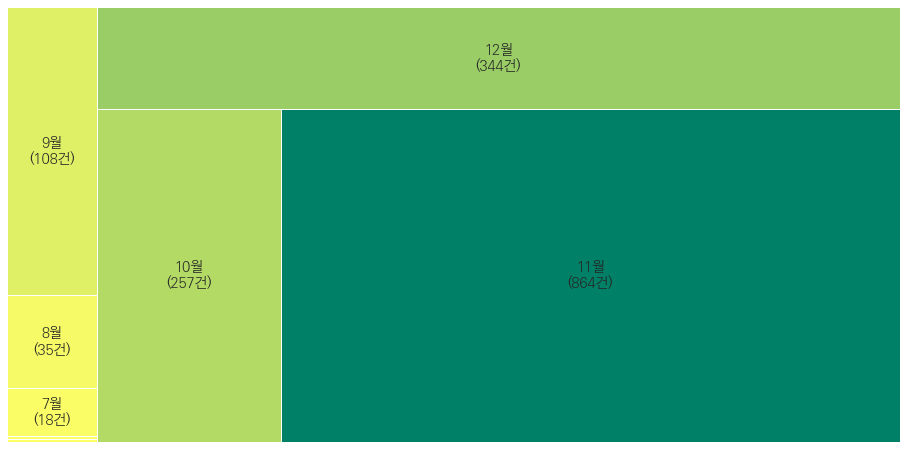

In [13]:
# 색상지도 정규화
cmap = matplotlib.cm.summer_r
norm = matplotlib.colors.Normalize(vmin=shapes.total.min(), vmax=shapes.total.max())
colors = [cmap(norm(value)) for value in shapes.total]

# 2021년 월별 블로그, 카페 건수 트리맵
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
plt.figure(figsize=(16,8)); plt.axis('off')
squarify.plot(
    sizes=shapes.total,
    color=colors,
    label=shapes.apply(lambda x: str(x.month) + '월\n(' + str(x.total) + '건)' if x.total >= 10 else '', axis=1),
    alpha=1)
plt.savefig('/Users/charles/git/metaverse/image/kakaoapi_squarify01.png', bbox_inches='tight')

In [14]:
# 가장 많은 '메타버스' 글을 올린 블로그, 카페
shapes = df.groupby(df['name']).size().reset_index()
shapes.columns = ['name', 'total']
shapes.sort_values("total", ascending=False).head(5)

,name,total
767,"증권정보채널-주식랭킹1위카페( 주식 ,증권,테마주, 주식 카페 )",81
170,■ 코인천사 - 비트코인 | 블록체인 세상 ■,53
480,"불스탁 주식투자연구소『주식,증권,펀드,재테크,테마주』",39
34,CK투자그룹,34
179,★부동산투자스쿨★꼬마빌딩건물주되기프로젝트,34


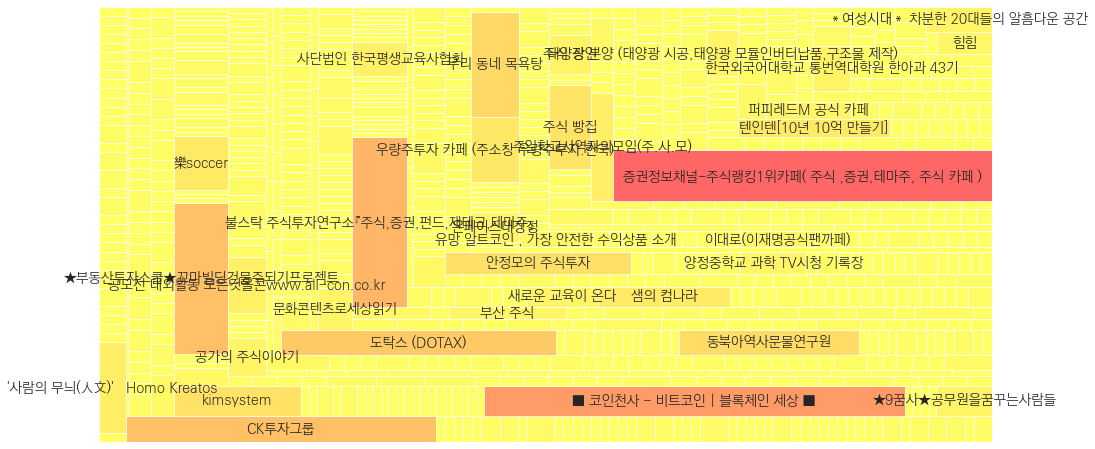

In [15]:
# 색상지도 정규화
cmap = matplotlib.cm.autumn_r
norm = matplotlib.colors.Normalize(vmin=shapes.total.min(), vmax=shapes.total.max())
colors = [cmap(norm(value)) for value in shapes.total]

# 가장 많은 '메타버스' 글을 올린 블로그, 카페 트리맵
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
plt.figure(figsize=(16,8)); plt.axis('off')
squarify.plot(
    sizes=shapes.total,
    color=colors,
    label=shapes.apply(lambda x: x['name'] if x.total >= 5 else '', axis=1),
    alpha=0.6)
plt.savefig('/Users/charles/git/metaverse/image/kakaoapi_squarify02.png', bbox_inches='tight')